# Project Title - Email Spam Ham Detection

## Name - Apoorva
## Phase 2 Task 1

# Problem Statement:

In the contemporary digital landscape, the exponential increase in email communication has led to a surge in the volume of unwanted and potentially harmful messages, commonly known as spam. Email users are sent unsolicited emails that can range from mere nuisances to serious security threats. To address this issue and enhance the email experience, the goal is to develop an efficient and accurate Email Spam Detection system.

In [33]:
#dataframe modules

import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from tabulate import tabulate
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# text
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# ML
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

#confusion matrix modules
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Fetch Dataset from drive**

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [35]:
%cd /content/drive/My Drive/CODERSCAVE

/content/drive/My Drive/CODERSCAVE


In [36]:
%ls

globalterrorism.csv  spam_ham_dataset.csv


## **Load Dataset**

In [37]:
dataset =pd.read_csv("/content/drive/My Drive/CODERSCAVE/spam_ham_dataset.csv",encoding='latin-1')

In [38]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [39]:
dataset.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

## **Data Viz - Spam | Ham Emails**

In [40]:
spam_ham_count=dataset["label"].value_counts()
spam_ham_count

ham     3672
spam    1499
Name: label, dtype: int64

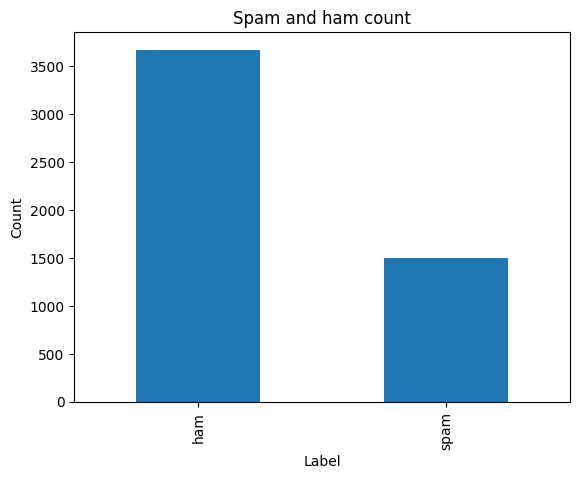

In [41]:
spam_ham_count.plot.bar()

plt.title("Spam and ham count")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

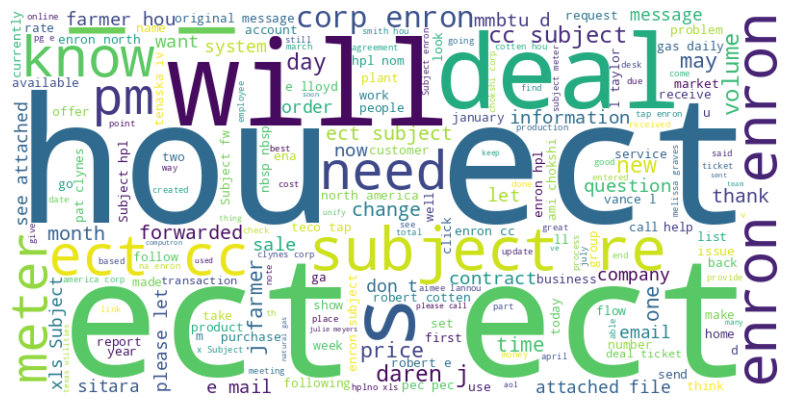

In [26]:
text_data = ' '.join(dataset['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


## **Fetching random samples from the dataset**

In [27]:
random_rows = dataset.sample(n=2)
result_dict = random_rows.to_dict(orient='records')
pprint(result_dict, indent=3)


[  {  'Unnamed: 0': 1003,
      'label': 'ham',
      'label_num': 0,
      'text': 'Subject: hl & p volumes 6 / 00\r\n'
              'disregard the prior e - mail . this is the correct spreadsheet '
              'for hl & p .\r\n'
              '- - - - - - - - - - - - - - - - - - - - - - forwarded by aimee '
              'lannou / hou / ect on 06 / 19 / 2000 02 : 10\r\n'
              'pm - - - - - - - - - - - - - - - - - - - - - - - - - - -\r\n'
              'aimee lannou 06 / 19 / 2000 01 : 59 pm\r\n'
              'to : pat clynes / corp / enron @ enron , daren j farmer / hou / '
              'ect @ ect , gary a\r\n'
              'hanks / hou / ect @ ect\r\n'
              'cc :\r\n'
              'subject : hl & p volumes 6 / 00'},
   {  'Unnamed: 0': 1367,
      'label': 'ham',
      'label_num': 0,
      'text': 'Subject: cdnow order confirmation\r\n'
              'dear daren ,\r\n'
              'thank you for shopping at cdnow .\r\n'
              'this email is to con

In [28]:
# Set of English stop words
stop_words = set(stopwords.words('english'))

# Apply stop words removal to the 'text' column
dataset['text'] = dataset['text'].apply(lambda text: ' '.join([mail_words for mail_words in word_tokenize(text) if not mail_words in stop_words]))

# Print the DataFrame with updated 'text' column
print(dataset)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject : enron methanol ; meter # : 988291 fo...   
1           2349   ham  Subject : hpl nom january 9 , 2001 ( see attac...   
2           3624   ham  Subject : neon retreat ho ho ho , ' around won...   
3           4685  spam  Subject : photoshop , windows , office . cheap...   
4           2030   ham  Subject : : indian springs deal book teco pvr ...   
...          ...   ...                                                ...   
5166        1518   ham  Subject : put 10 ft transport volumes decrease...   
5167         404   ham  Subject : 3 / 4 / 2000 following noms hpl ' ta...   
5168        2933   ham  Subject : calpine daily gas nomination > > jul...   
5169        1409   ham  Subject : industrial worksheets august 2000 ac...   
5170        4807  spam  Subject : important online banking alert dear ...   

      label_num  
0             0  
1             0  
2             0  
3  

In [29]:
X = dataset.loc[:, 'text']
y = dataset.loc[:, 'label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
print(f"Train Shape: {X_train.shape}\nTest Shape: {X_test.shape}")

Train Shape: (4136,)
Test Shape: (1035,)


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

#  X_train and X_test are already defined

# Step : Preprocess the text data
# Create a pipeline with CountVectorizer and Multinomial Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9758454106280193

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       744
           1       0.96      0.96      0.96       291

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



A breakdown of the key metrics in the above classification:

- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, it's 0.98, and for class 1, it's 0.96. High precision relates to the low false positive rate.

- Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. For class 0, it's 0.98, and for class 1, it's 0.96. High recall relates to the low false negative rate.

- F1-Score: The F1-Score is the weighted average of precision and recall. It ranges from 0 to 1, where 1 is the best possible F1-Score. For class 0, it's 0.98, and for class 1, it's 0.96.

- Support: Support is the number of actual occurrences of the class in the specified dataset. For class 0, it's 744, and for class 1, it's 291.

- Accuracy: The overall accuracy of the model is 0.9758 or 97.58%, indicating the proportion of correctly classified instances out of the total instances.

- Overall, the model is performing well, with high precision, recall, and accuracy.

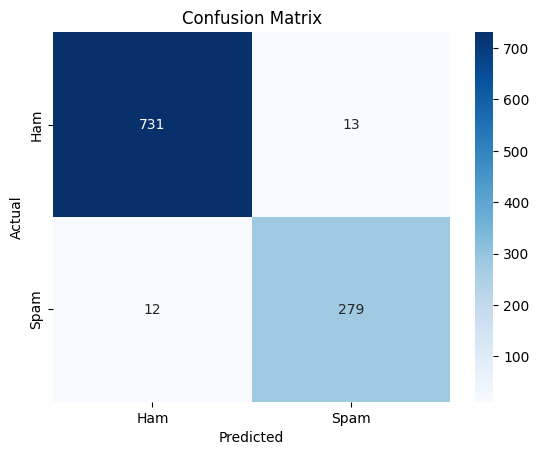

In [31]:


# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Creation of a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:

# Sample text to test
new_text = ["Congratulations! You've won a free iPhone. Click here to claim your prize."]

# Predict the label for the new text
predicted_label = model.predict(new_text)

# Display the result
if predicted_label[0] == 1:
    print("The text is predicted as SPAM.")
else:
    print("The text is predicted as HAM.")


The text is predicted as SPAM.
